In [ ]:
# Install required library
!pip install sunpy
!pip install drms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required library
import drms
import json, numpy as np, matplotlib.pylab as plt, matplotlib.ticker as mtick
from datetime import datetime as dt_obj
import urllib
from matplotlib.dates import *
import sunpy.map
import sunpy.io
from IPython.display import Image
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
# Connect to Gdrive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# DATA QUERY

In [ ]:
# Server connect
import drms
c = drms.Client()

In [ ]:
# Data query
df = pd.DataFrame(columns=['T_REC', 'NOAA_AR', 'LAT_FWT', 'LON_FWT', 'CRLN_OBS', 'CRLT_OBS', 'CAR_ROT', 'SIZE', 'AREA'])

for i in range(1, 31):
  print(i)
  if i < 10:
    keys, segments = c.query('hmi.sharp_cea_720s_nrt[][2023.03.0' + str(i) + '_00:00:00/24h][]', key='T_REC, NOAA_AR, LAT_FWT, LON_FWT, CRLN_OBS, CRLT_OBS, CAR_ROT, SIZE, AREA', seg='Br')
  else: 
    keys, segments = c.query('hmi.sharp_cea_720s_nrt[][2023.03.' + str(i) + '_00:00:00/24h][]', key='T_REC, NOAA_AR, LAT_FWT, LON_FWT, CRLN_OBS, CRLT_OBS, CAR_ROT, SIZE, AREA', seg='Br')
  frames = [df, keys]
  df = pd.concat(frames)

df.to_csv('AR_COORD.csv')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


# DATA PROCESSING

In [ ]:
# Data load
df = pd.read_csv('/gdrive/MyDrive/CC/temp/AR_COORD.csv')
numbered = df.loc[df['NOAA_AR'] > 0]                                            # Filter the data which only have ARNUM
numbered

,Unnamed: 0,T_REC,NOAA_AR,LAT_FWT,LON_FWT,CRLN_OBS,CRLT_OBS,CAR_ROT,SIZE,AREA
0,0,2023.03.01_00:00:00_TAI,13230,-26.628857,45.503185,308.056274,-7.222667,2268,8509.381836,6606.480469
1,1,2023.03.01_00:12:00_TAI,13230,-26.615877,45.633675,307.946198,-7.222681,2268,8467.170898,6586.148926
2,2,2023.03.01_00:24:00_TAI,13230,-26.641249,45.661575,307.836151,-7.222664,2268,8430.560547,6570.284180
3,3,2023.03.01_00:36:00_TAI,13230,-26.625322,45.788017,307.726105,-7.222616,2268,8388.951172,6550.056152
4,4,2023.03.01_00:48:00_TAI,13230,-26.621008,45.911526,307.616119,-7.222539,2268,8348.202148,6530.872559
...,...,...,...,...,...,...,...,...,...,...
44434,105,2023.03.24_02:00:00_TAI,13262,-19.071024,-56.862911,3.848442,-6.933695,2268,3178.981689,2971.251953
44435,106,2023.03.24_02:12:00_TAI,13262,-19.050777,-56.735100,3.738572,-6.932866,2268,3189.803955,2972.164307
44436,107,2023.03.24_02:24:00_TAI,13262,-19.059950,-56.644028,3.628742,-6.932021,2268,3200.812500,2972.446045
44437,108,2023.03.24_02:36:00_TAI,13262,-19.067963,-56.522247,3.518952,-6.931162,2268,3210.934570,2971.873291


In [ ]:
# Function to parse T_REC unto datetime
def to_date(tstr):
    year   = int(tstr[:4])
    month  = int(tstr[5:7])
    day    = int(tstr[8:10])
    hour   = int(tstr[11:13])
    minute = int(tstr[14:16])
    return dt_obj(year, month, day, hour, minute)

In [ ]:
NOAA_list = np.array(numbered[['NOAA_AR']].drop_duplicates()).flatten()         # ARNUM list to calculate per AR
datetime = [to_date(i) for i in np.array(numbered[['T_REC']]).flatten()]        # Parse T_REC to datetime
numbered['datetime'] = datetime
numbered = numbered.reset_index()
numbered

<ipython-input-6-49cd627ce80a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numbered['datetime'] = datetime


,index,Unnamed: 0,T_REC,NOAA_AR,LAT_FWT,LON_FWT,CRLN_OBS,CRLT_OBS,CAR_ROT,SIZE,AREA,datetime
0,0,0,2023.03.01_00:00:00_TAI,13230,-26.628857,45.503185,308.056274,-7.222667,2268,8509.381836,6606.480469,2023-03-01 00:00:00
1,1,1,2023.03.01_00:12:00_TAI,13230,-26.615877,45.633675,307.946198,-7.222681,2268,8467.170898,6586.148926,2023-03-01 00:12:00
2,2,2,2023.03.01_00:24:00_TAI,13230,-26.641249,45.661575,307.836151,-7.222664,2268,8430.560547,6570.284180,2023-03-01 00:24:00
3,3,3,2023.03.01_00:36:00_TAI,13230,-26.625322,45.788017,307.726105,-7.222616,2268,8388.951172,6550.056152,2023-03-01 00:36:00
4,4,4,2023.03.01_00:48:00_TAI,13230,-26.621008,45.911526,307.616119,-7.222539,2268,8348.202148,6530.872559,2023-03-01 00:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...
16048,44434,105,2023.03.24_02:00:00_TAI,13262,-19.071024,-56.862911,3.848442,-6.933695,2268,3178.981689,2971.251953,2023-03-24 02:00:00
16049,44435,106,2023.03.24_02:12:00_TAI,13262,-19.050777,-56.735100,3.738572,-6.932866,2268,3189.803955,2972.164307,2023-03-24 02:12:00
16050,44436,107,2023.03.24_02:24:00_TAI,13262,-19.059950,-56.644028,3.628742,-6.932021,2268,3200.812500,2972.446045,2023-03-24 02:24:00
16051,44437,108,2023.03.24_02:36:00_TAI,13262,-19.067963,-56.522247,3.518952,-6.931162,2268,3210.934570,2971.873291,2023-03-24 02:36:00


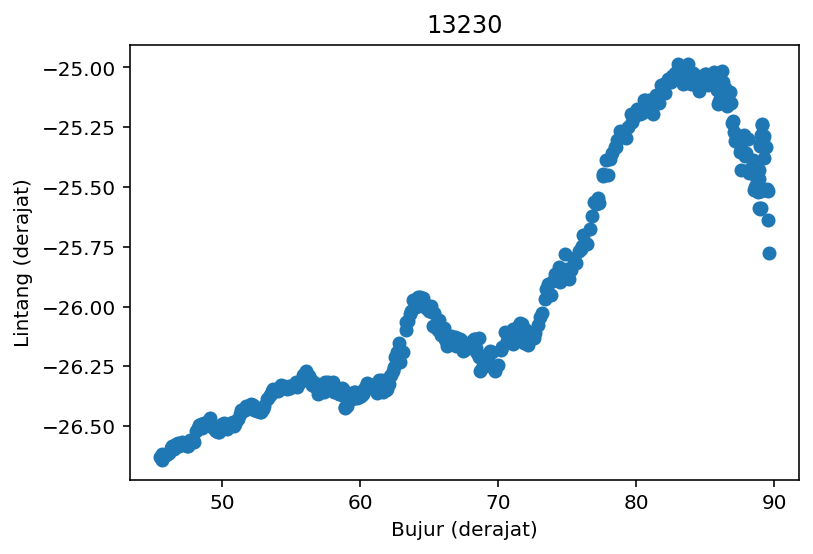

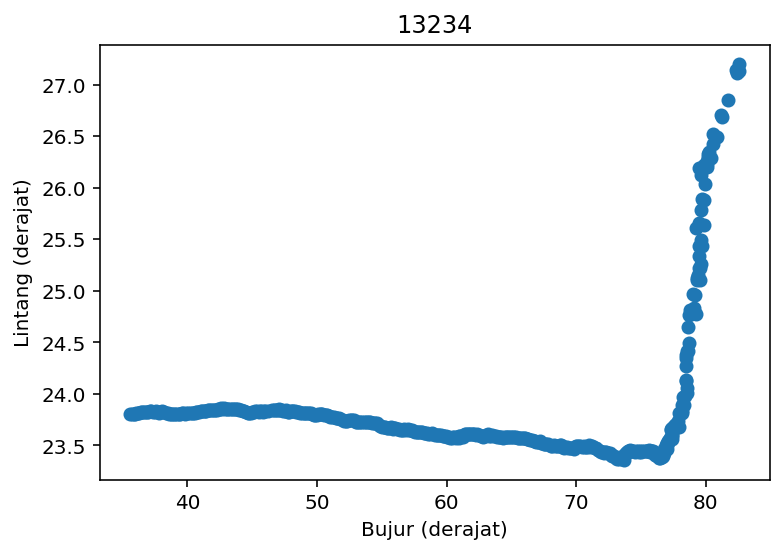

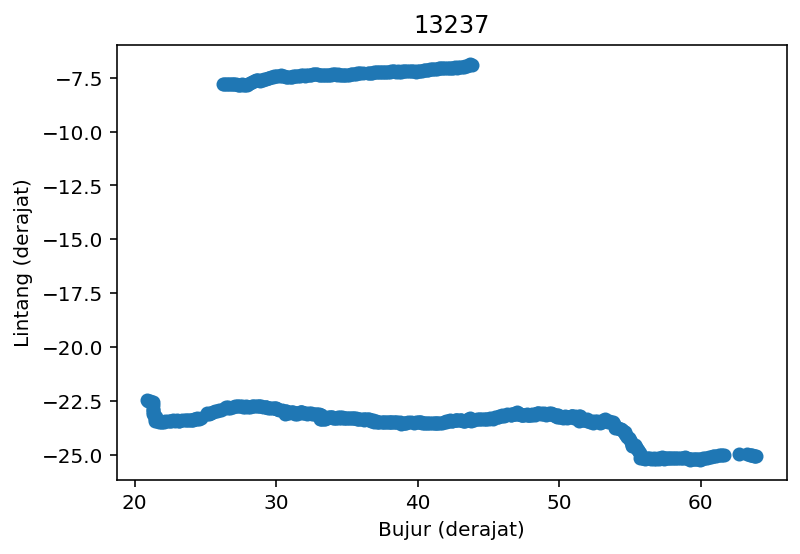

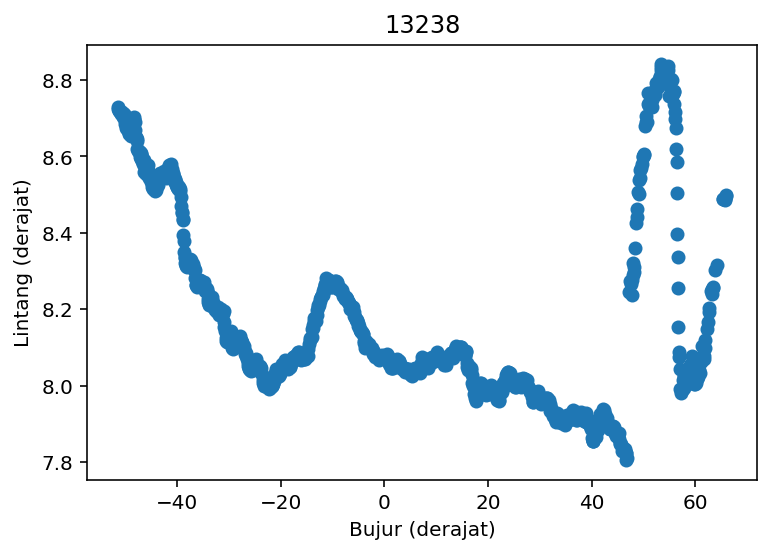

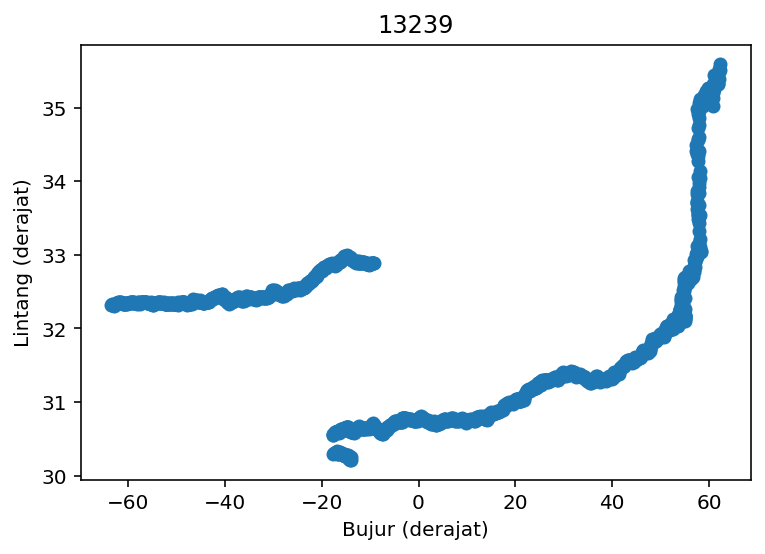

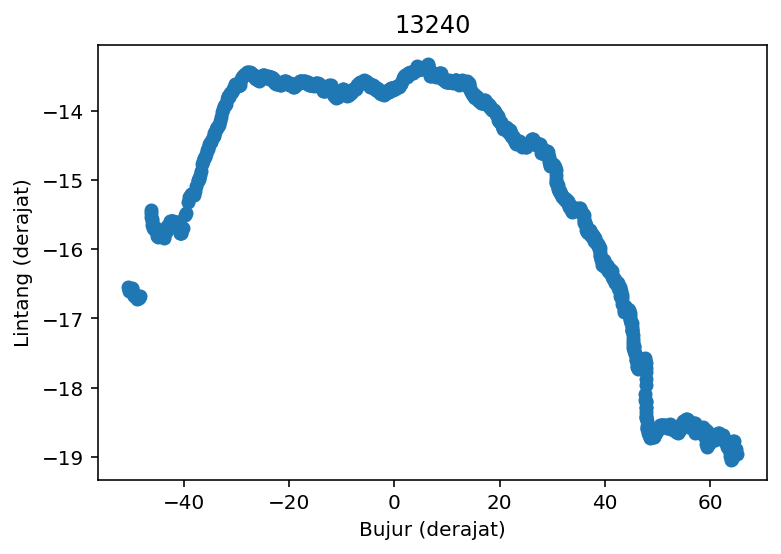

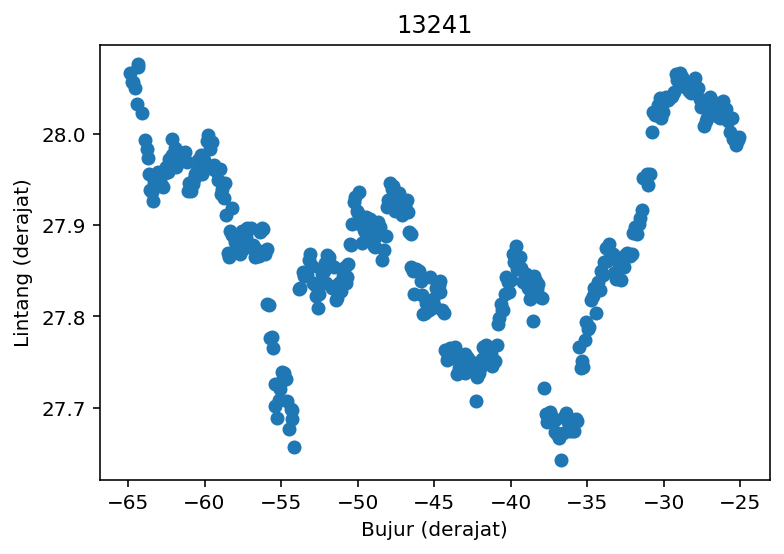

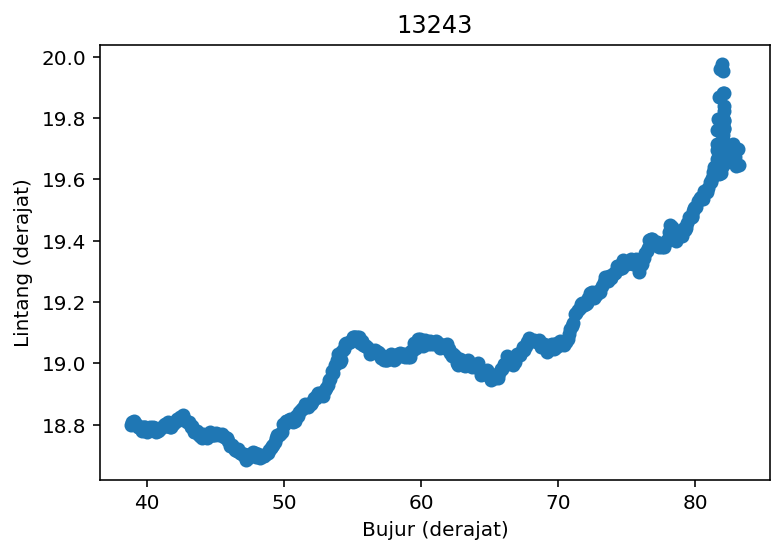

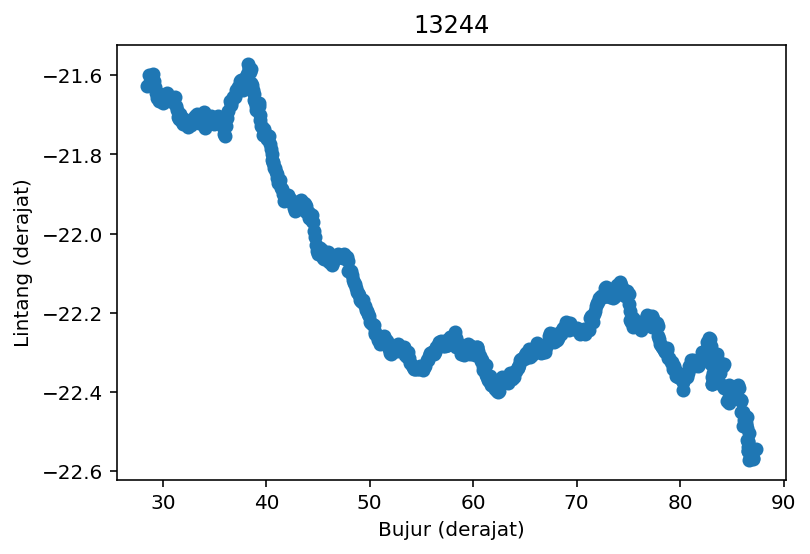

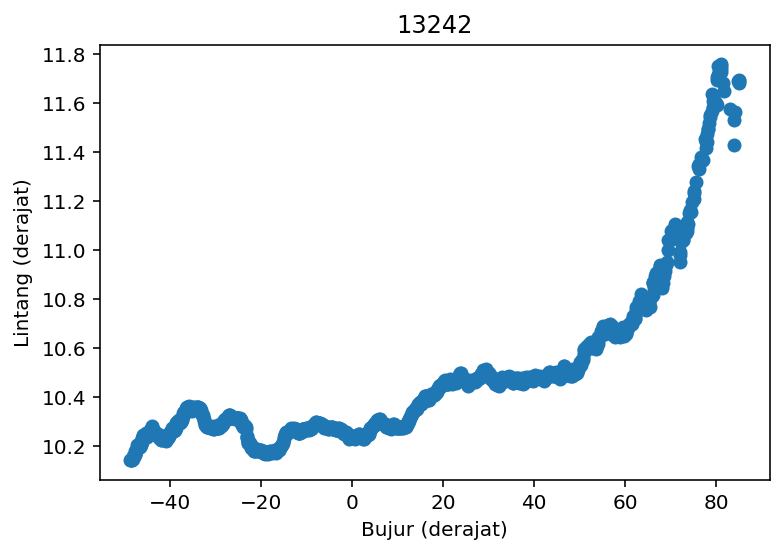

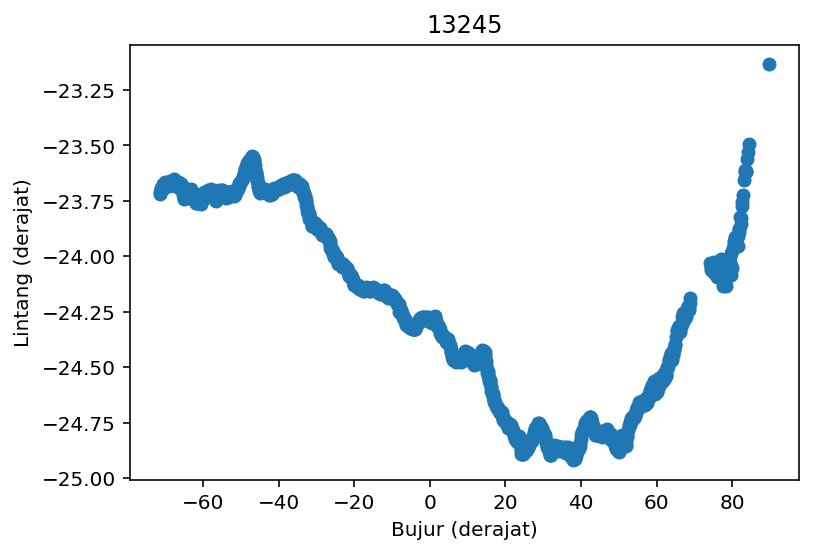

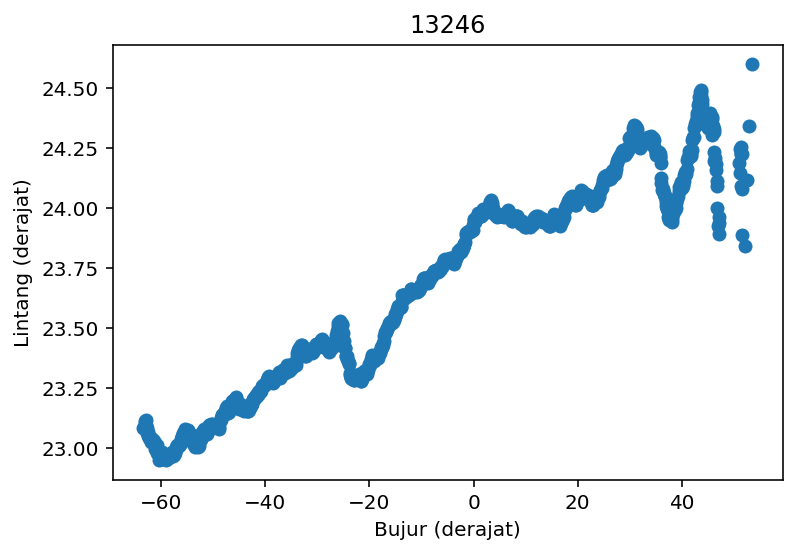

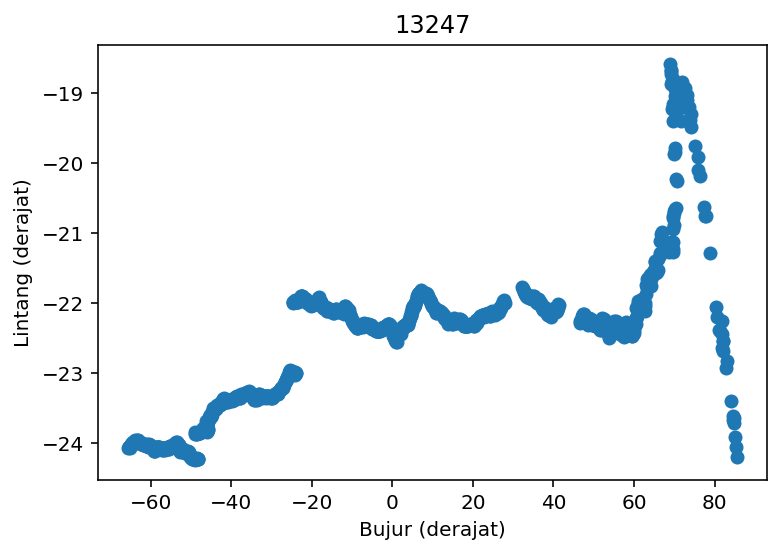

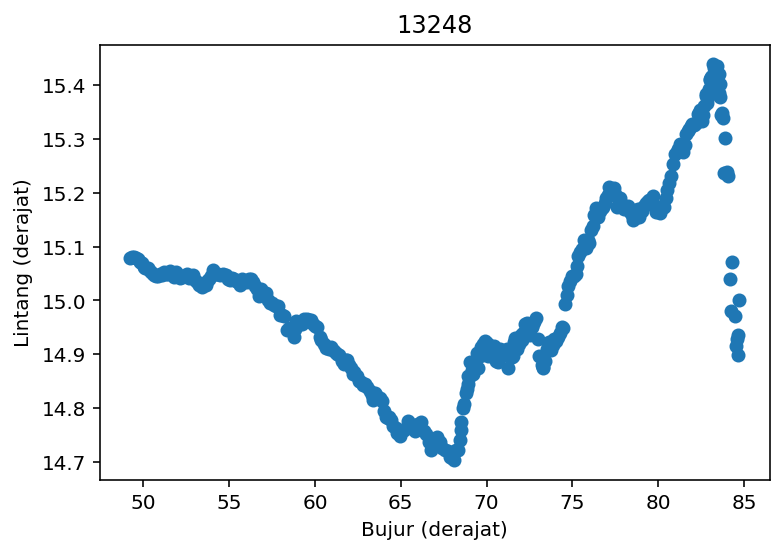

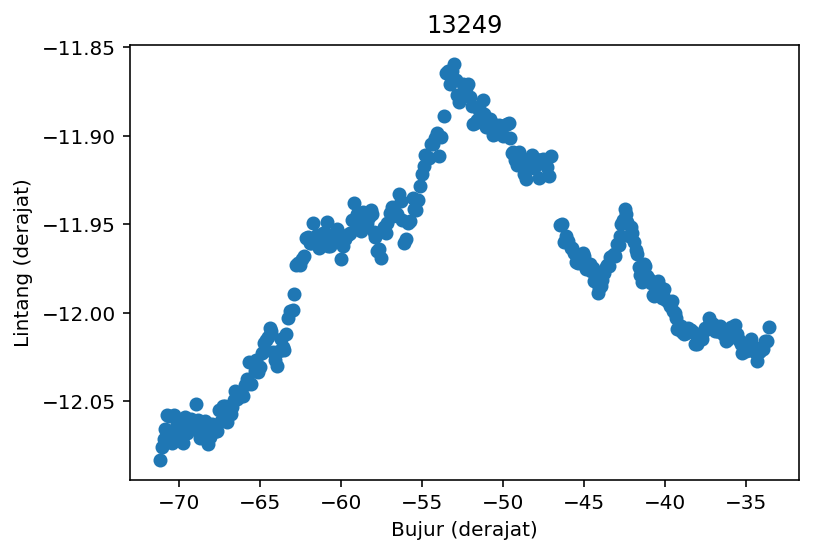

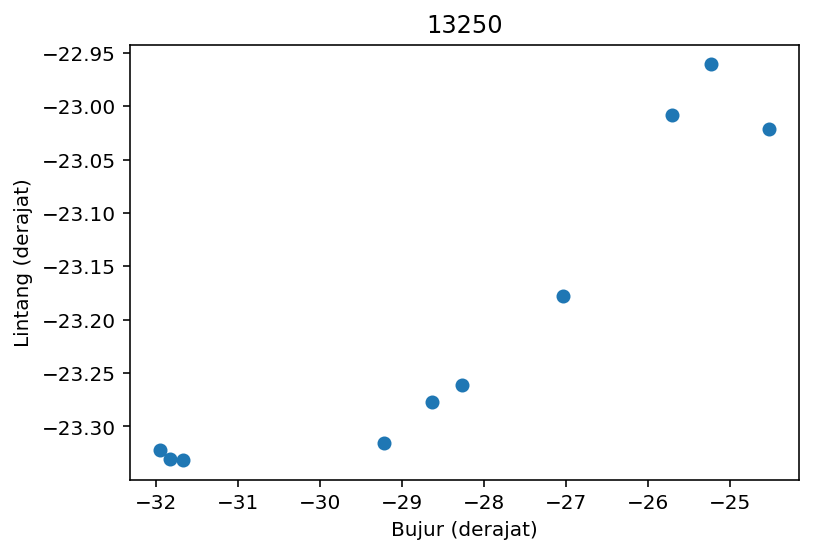

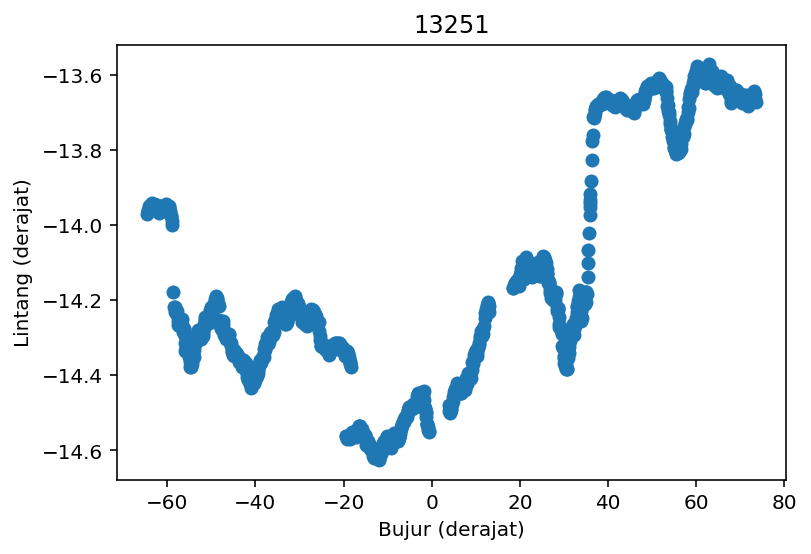

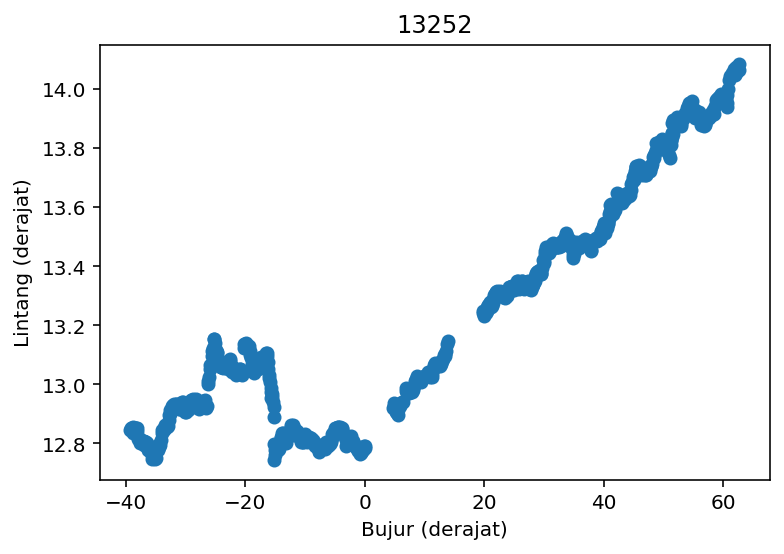

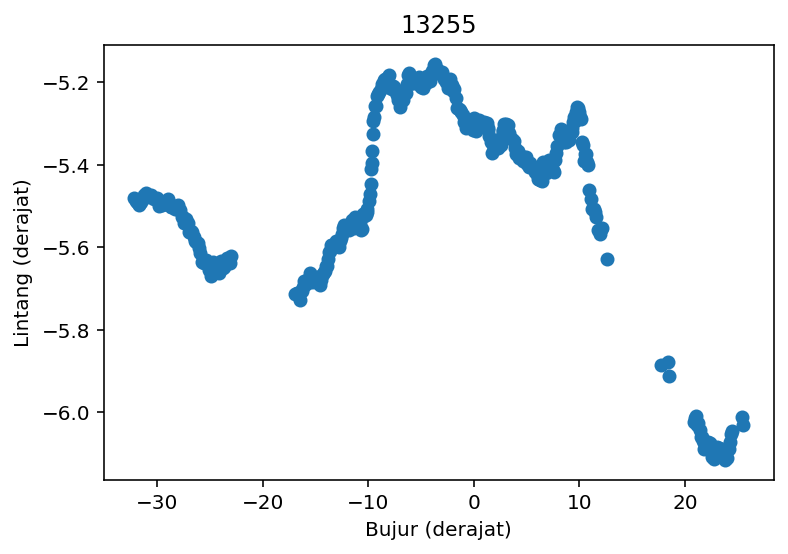

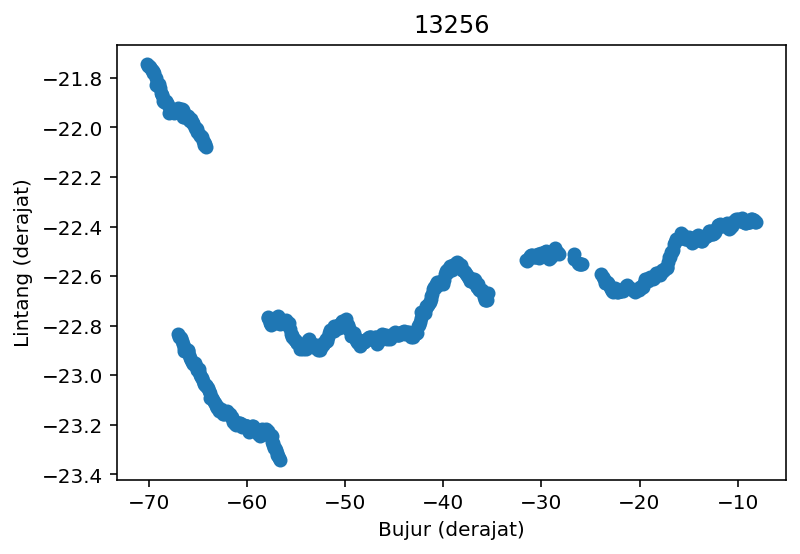

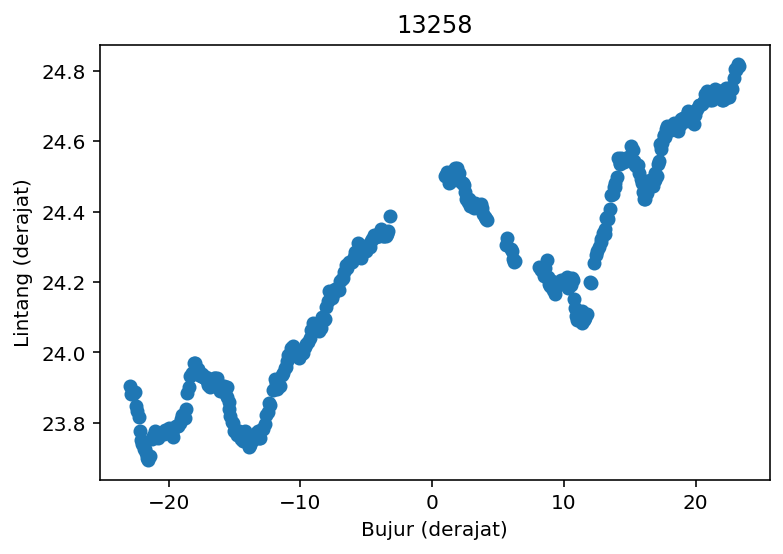

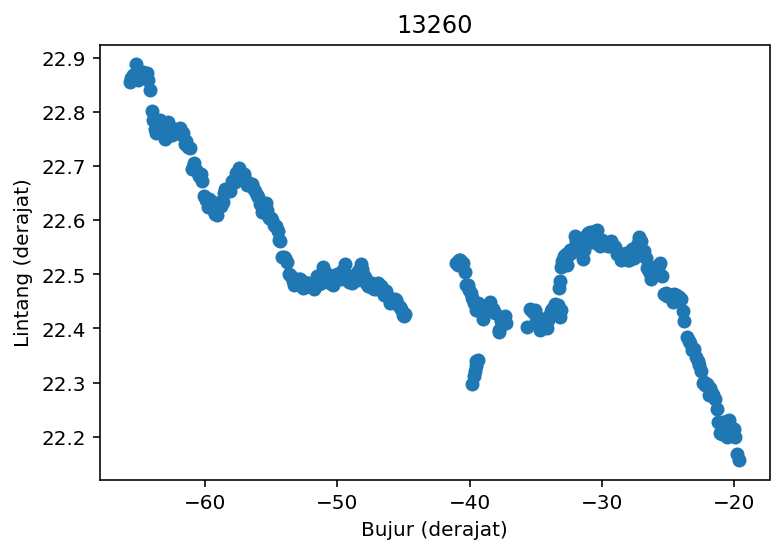

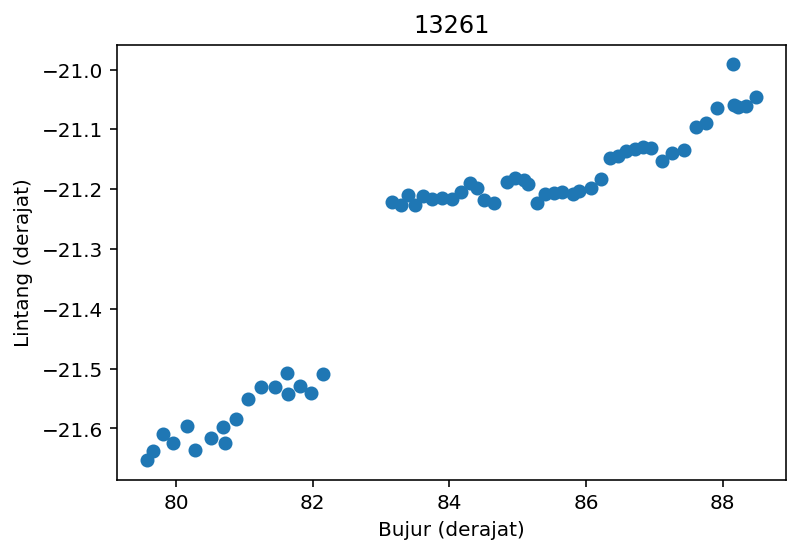

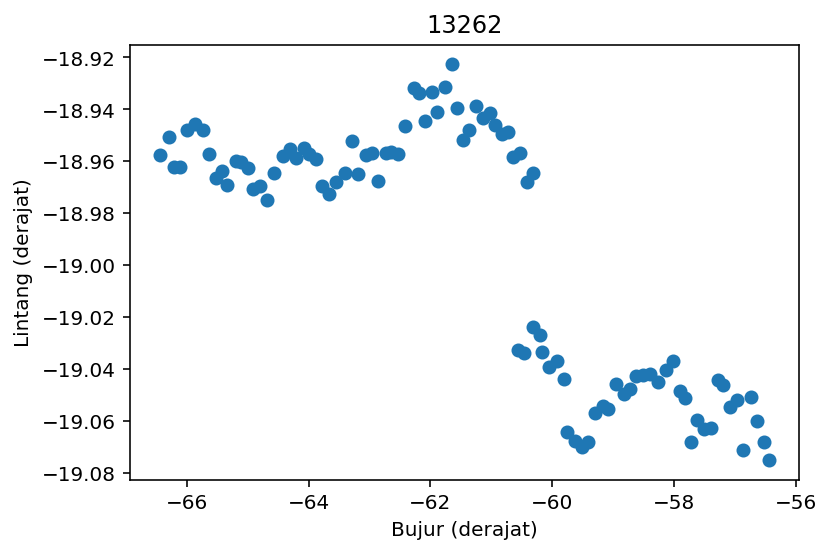

In [ ]:
# ARs Movements Plot
ARNUM = np.array(DF['NOAA_AR'])
for i in ARNUM:
  dat = numbered.loc[numbered['NOAA_AR'] == i]
  plt.plot(dat['LON_FWT'], dat['LAT_FWT'], 'o')
  plt.xlabel('Bujur (derajat)')
  plt.ylabel('Lintang (derajat)')
  plt.title(str(i))
  plt.show()

In [ ]:
# Empty list to store each calculated parameter
LAT = []
PERIOD = []
NOAA = []

# Parameter calculation per AR
for i in NOAA_list:
  data = numbered[numbered['NOAA_AR'] == i]
  lon = np.array(data[['LON_FWT']]).flatten()
  time = np.array(data[['datetime']]).flatten()
  NOAA.append(i)                                                                                              # Append the NOAA ARNUM 
  LAT.append((np.median(data['LAT_FWT'])))                                                                    # We use the median to represent the latitude of the AR  
  p = []                                                                                                      # Empty list to store calculated period of each AR 
  for i in range(10, len(lon)):
    p.append(360 * ((time[i] - time[i-10])/np.timedelta64(1, 'h')) / abs((lon[i]) - (lon[i-10])))             # P = 360 * dt / dl ,   dt: delta time,   dl: delta longitude
  S = abs(np.median(p)/24)                                                                                    # Use the median of the periods as representative period
  PERIOD.append(S*365.25 / (S+365.25))                                                                        # Sidereal correction

DATA = {'NOAA_AR': NOAA,
        'LAT': LAT, 
        'PERIOD': PERIOD}

DF = pd.DataFrame(DATA)                                                                                       # Result for each AR
DF

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,NOAA_AR,LAT,PERIOD
0,13230,-26.142935,27.788795
1,13234,23.699026,24.759574
2,13237,-23.212850,26.732833
3,13238,8.075830,25.487285
4,13239,31.904609,27.801151
5,13240,-14.487364,26.605839
6,13241,27.868540,27.505943
7,13243,19.041681,25.412368
8,13244,-22.240608,26.759540
9,13242,10.355304,25.185692


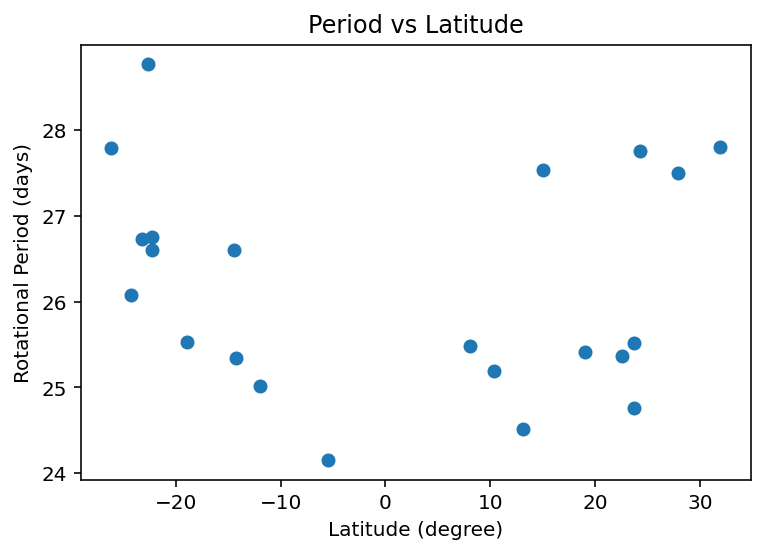

<ipython-input-8-dcb06047dc31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['omega'] = omega


,NOAA_AR,LAT,PERIOD,omega
0,13230,-26.142935,27.788795,12.954862
1,13234,23.699026,24.759574,14.539830
2,13237,-23.212850,26.732833,13.466586
3,13238,8.075830,25.487285,14.124690
4,13239,31.904609,27.801151,12.949104
5,13240,-14.487364,26.605839,13.530864
6,13241,27.868540,27.505943,13.088081
7,13243,19.041681,25.412368,14.166330
8,13244,-22.240608,26.759540,13.453146
9,13242,10.355304,25.185692,14.293830


In [ ]:
no_outliers = DF.loc[DF['PERIOD'] > 21]                                         # Remove outliers (period < 21 days)

plt.plot(no_outliers['LAT'], no_outliers['PERIOD'], 'o')
plt.title('Period vs Latitude')
plt.xlabel('Latitude (degree)')
plt.ylabel('Rotational Period (days)')
plt.show()

omega = [360/p for p in no_outliers['PERIOD']]                                  # Create new parameter omega (rotational velocity)
no_outliers['omega'] = omega
no_outliers

[14.53095202 -7.06048737  4.89296836]


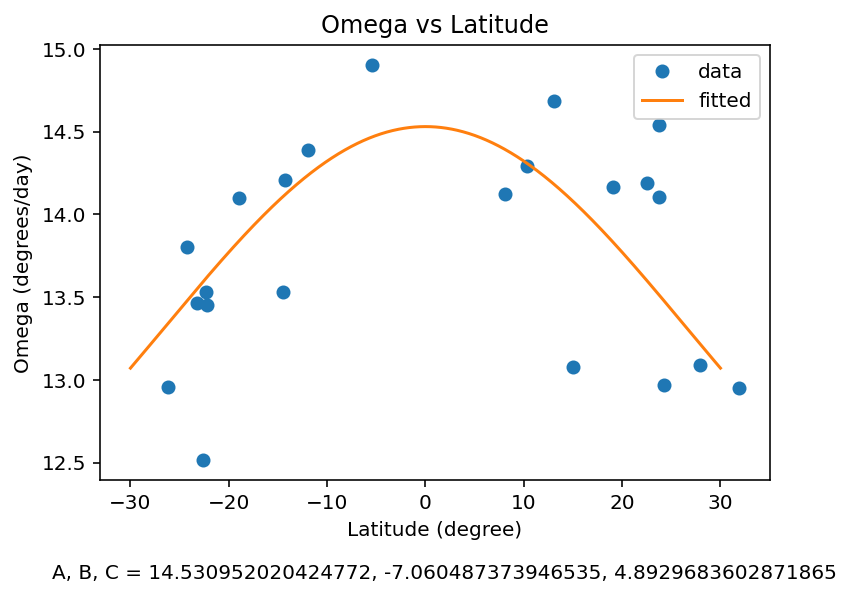

In [ ]:
from scipy.optimize import curve_fit                                                                          # Curve fit to fit the data

def fun(lat, A, B, C):                                                                                        # Fitting function (Durney, 1974)
  return(A + B*(np.sin(np.pi*lat/180))**2 + C*(np.sin(np.pi*lat/180))**4)                                     # https://www.researchgate.net/publication/256110495_On_the_sun's_differential_rotation

popt, pcov = curve_fit(fun, np.array(no_outliers['LAT']).flatten(), np.array(no_outliers['omega']).flatten()) # Fit the data
print(popt)                                                                                                   # Parameter fitted

x = np.linspace(-30, 30, 1000)

plt.plot(no_outliers['LAT'], no_outliers['omega'], 'o', label='data')                                         # Plot the data vs fitted function
plt.plot(x, fun(x, *popt), label='fitted')
plt.text(-38, 11.8, 'A, B, C = ' + str(popt[0]) + ', ' + str(popt[1]) + ', ' + str(popt[2]))
plt.title('Omega vs Latitude')
plt.xlabel('Latitude (degree)')
plt.ylabel('Omega (degrees/day)')
plt.legend()
plt.show()

# Calculated Data

In [ ]:
A = pd.read_csv('/gdrive/MyDrive/CC/temp/A.csv', delimiter=';')
B = pd.read_csv('/gdrive/MyDrive/CC/temp/B.csv', delimiter=';')
C = pd.read_csv('/gdrive/MyDrive/CC/temp/C.csv', delimiter=';')
D = pd.read_csv('/gdrive/MyDrive/CC/temp/D.csv', delimiter=';')

In [ ]:
import astropy.units as u

def helio(x, y, D, B0, P, L0, dg):
  ro1 = D * np.sqrt(x**2 + y**2) / dg
  ro = np.arcsin(2*ro1/D) - ro1
  teta = np.arctan(x/y)
  B = np.arcsin(np.sin(B0)*np.cos(ro) + np.cos(B0)*np.sin(ro)*np.cos(P - teta))
  L = np.arcsin(np.sin(ro)*np.sin(P - teta) / np.cos(B)) + L0
  return B, L



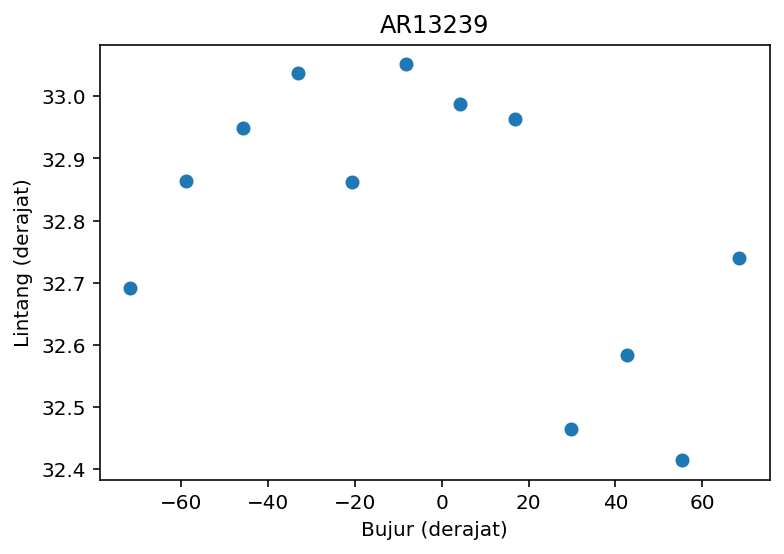

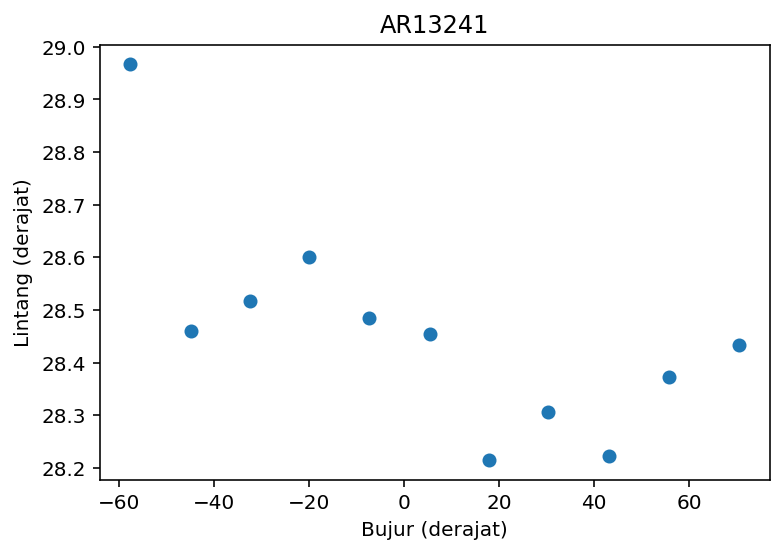

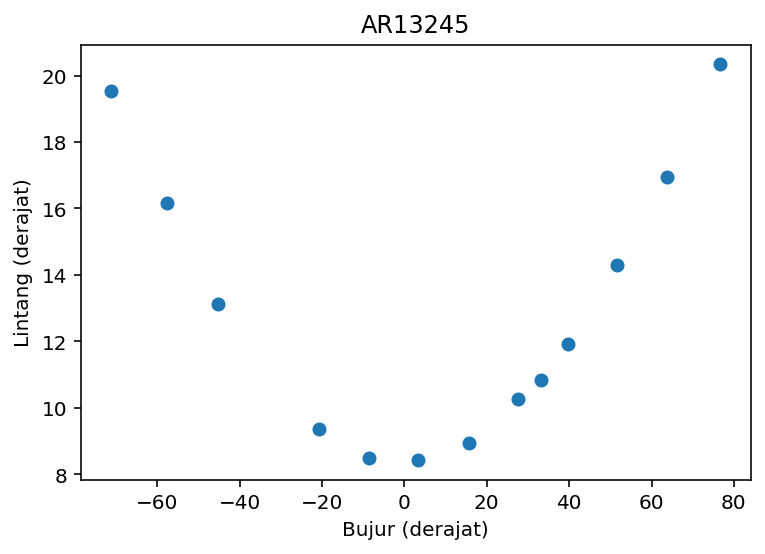

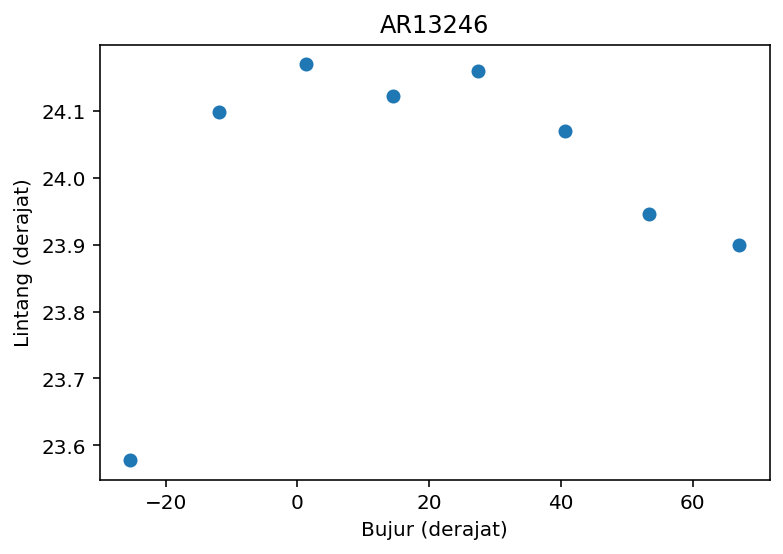

In [ ]:
DATA = [A, B, C, D]
num = ['13239','13241','13245','13246']
k = 0
for i in DATA:
  B0 = [j * u.degree for j in np.array(i.iloc[:, [2]])]
  L0 = [0 * u.degree for j in np.array(i.iloc[:, [3]])]
  P = [0 * u.degree for j in np.array(i.iloc[:, [4]])]
  DD = [j * u.arcmin for j in np.array(i.iloc[:, [7]])]
  dg = [j * u.mm for j in np.array(i.iloc[:, [8]])]
  x = [j * u.mm for j in np.array(i.iloc[:, [9]])]
  y = [j * u.mm for j in np.array(i.iloc[:, [10]])]
  BB = []
  LL = []
  for j in range(len(P)):
    b, l = helio(x[j], y[j], DD[j], B0[j], P[j], L0[j], dg[j])
    BB.append(b.to(u.degree))
    LL.append(l.to(u.degree))
  i['B'] = BB
  i['L'] = LL
  plt.plot(LL, BB, 'o')
  plt.xlabel('Bujur (derajat)')
  plt.ylabel('Lintang (derajat)')
  plt.title('AR' + num[k])
  plt.show()
  k += 1

In [ ]:
DATA = [A, B, D]
num = ['13239','13241','13246']

# Empty list to store each calculated parameter
LAT = []
PERIOD = []
NOAA = []

# Parameter calculation per AR
for i in DATA:
  data = i
  lon = np.array(data[['L']]).flatten()                                          
  LAT.append((np.median(data['B']).value))                                      # We use the median to represent the latitude of the AR  
  p = []                                                                        # Empty list to store calculated period of each AR 
  for i in range(1, len(lon)):
    p.append(360 * 1 / abs((lon[i]) - (lon[i-1])))                              # P = 360 * dt / dl ,   dt: delta time (1 day),   dl: delta longitude
  S = abs(np.median(p))                                                         # Use the median of the periods as representative period
  PERIOD.append(S*365.25 / (S+365.25))                                          # Sidereal correction

DATA = {'NOAA_AR': num,
        'LAT': LAT, 
        'PERIOD': PERIOD}

DF1 = pd.DataFrame(DATA)                                                        # Result for each AR

omega = [360/p for p in DF1['PERIOD']]                                          # Create new parameter omega (rotational velocity)
DF1['omega'] = omega
DF1

,NOAA_AR,LAT,PERIOD,omega
0,13239,[32.862956129446914],26.239484,13.719782
1,13241,[28.45359013276517],26.417212,13.627479
2,13246,[24.084127011599975],25.352575,14.199741


[14.57473614 -8.66276301 15.52040531]


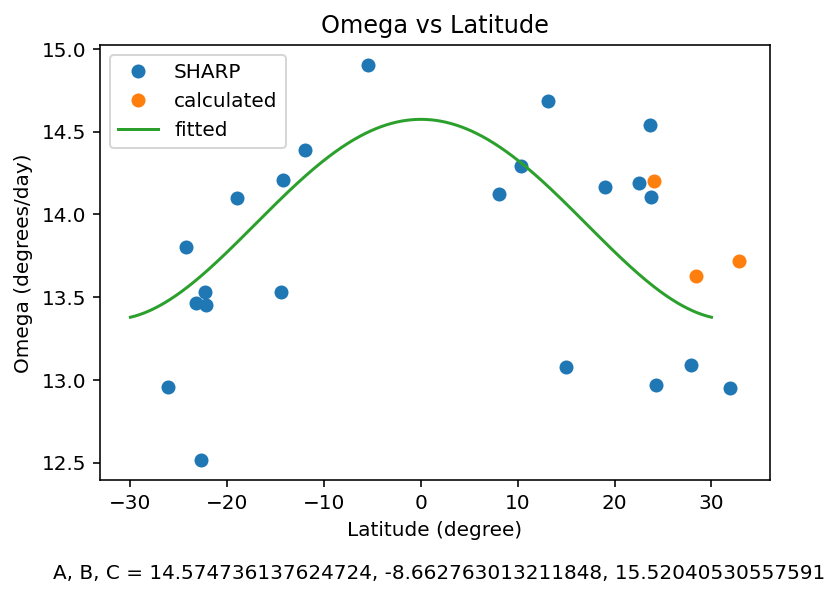

In [ ]:
from scipy.optimize import curve_fit                                                                           # Curve fit to fit the data

def fun(lat, A, B, C):                                                                                         # Fitting function (Durney, 1974)
  return(A + B*(np.sin(np.pi*lat/180))**2 + C*(np.sin(np.pi*lat/180))**4)                                      # https://www.researchgate.net/publication/256110495_On_the_sun's_differential_rotation

popt, pcov = curve_fit(fun, np.append(np.array(no_outliers['LAT']).flatten(), np.array(DF1['LAT']).flatten()), # Fit the data
                       np.append(np.array(no_outliers['omega']).flatten(), np.array(DF1['omega']).flatten())) 
print(popt)                                                                                                    # Parameter fitted

x = np.linspace(-30, 30, 1000)

plt.plot(no_outliers['LAT'], no_outliers['omega'], 'o', label='SHARP')                                         # Plot the data vs fitted function
plt.plot(DF1['LAT'], DF1['omega'], 'o', label='calculated')                                          
plt.plot(x, fun(x, *popt), label='fitted')
plt.text(-38, 11.8, 'A, B, C = ' + str(popt[0]) + ', ' + str(popt[1]) + ', ' + str(popt[2]))
plt.title('Omega vs Latitude')
plt.xlabel('Latitude (degree)')
plt.ylabel('Omega (degrees/day)')
plt.legend()
plt.show()

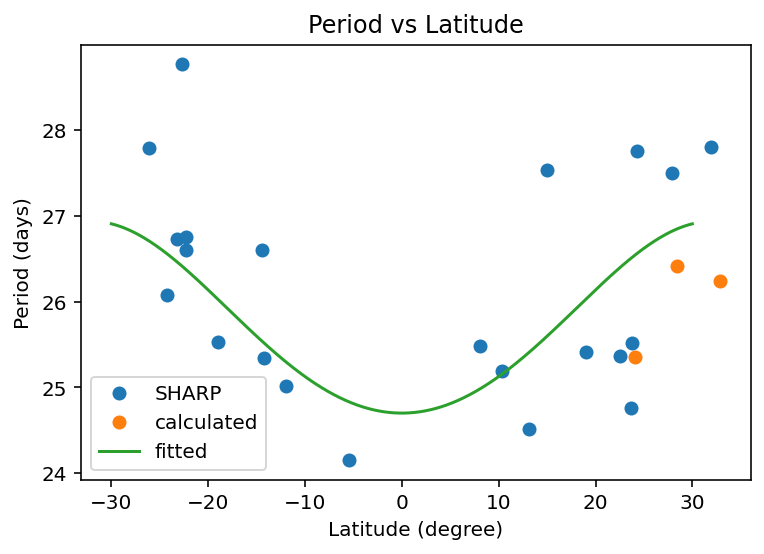

In [ ]:
x = np.linspace(-30, 30, 1000)

plt.plot(no_outliers['LAT'], 360/np.array(no_outliers['omega']), 'o', label='SHARP')                                         # Plot the data vs fitted function
plt.plot(DF1['LAT'], 360/np.array(DF1['omega']), 'o', label='calculated')                                          
plt.plot(x, 360 / (fun(x, *popt)), label='fitted')
#plt.text(-38, 11.8, 'A, B, C = ' + str(popt[0]) + ', ' + str(popt[1]) + ', ' + str(popt[2]))
plt.title('Period vs Latitude')
plt.xlabel('Latitude (degree)')
plt.ylabel('Period (days)')
plt.legend()
plt.show()